# Unsupervised learning with data from credit card customers

## Imports and configuration

In [1]:
# basic configuration, put these lines at the top of each notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams.update({'font.size': 22})
pd.options.display.max_columns = None
pd.set_option("display.precision", 2)
pd.options.display.max_rows = 100

## Data overview

In [4]:
data = pd.read_csv("../../data/credit-card-customers/credit-card-customers.csv")

In [5]:
data.shape

(8950, 18)

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12


In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.63,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.41,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


In [8]:
len(data.CUST_ID.unique())

8950

Link to dataset documentation: [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [9]:
data.corr().style.background_gradient(cmap='coolwarm')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.00,0.32,0.18,0.16,0.13,0.50,-0.08,0.07,-0.06,0.45,0.39,0.15,0.53,0.32,0.40,-0.32,0.07
BALANCE_FREQUENCY,0.32,1.00,0.13,0.10,0.12,0.10,0.23,0.20,0.18,0.19,0.14,0.19,0.10,0.07,0.13,-0.10,0.12
PURCHASES,0.18,0.13,1.00,0.92,0.68,-0.05,0.39,0.50,0.32,-0.12,-0.07,0.69,0.36,0.60,0.09,0.18,0.09
ONEOFF_PURCHASES,0.16,0.10,0.92,1.00,0.33,-0.03,0.26,0.52,0.13,-0.08,-0.05,0.55,0.32,0.57,0.05,0.13,0.06
INSTALLMENTS_PURCHASES,0.13,0.12,0.68,0.33,1.00,-0.06,0.44,0.21,0.51,-0.13,-0.07,0.63,0.26,0.38,0.13,0.18,0.09
CASH_ADVANCE,0.50,0.10,-0.05,-0.03,-0.06,1.00,-0.22,-0.09,-0.18,0.63,0.66,-0.08,0.30,0.45,0.14,-0.15,-0.07
PURCHASES_FREQUENCY,-0.08,0.23,0.39,0.26,0.44,-0.22,1.00,0.50,0.86,-0.31,-0.20,0.57,0.12,0.10,0.00,0.31,0.06
ONEOFF_PURCHASES_FREQUENCY,0.07,0.20,0.50,0.52,0.21,-0.09,0.50,1.00,0.14,-0.11,-0.07,0.54,0.30,0.24,-0.03,0.16,0.08
PURCHASES_INSTALLMENTS_FREQUENCY,-0.06,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1.00,-0.26,-0.17,0.53,0.06,0.09,0.03,0.25,0.07
CASH_ADVANCE_FREQUENCY,0.45,0.19,-0.12,-0.08,-0.13,0.63,-0.31,-0.11,-0.26,1.00,0.80,-0.13,0.13,0.18,0.10,-0.25,-0.13


## Remove missing data

In [10]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
cl_imp = SimpleImputer(strategy='median')
data.CREDIT_LIMIT = cl_imp.fit_transform(data.CREDIT_LIMIT.values.reshape(-1, 1))

In [12]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()

In [13]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Preprocess data

In [14]:
data = data.drop(columns=['CUST_ID'])

In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

In [16]:
X.shape

(8950, 17)

## Clustering with K-Means algorithm

In [17]:
kmean = KMeans(10)

In [18]:
%time kmean.fit(X)

CPU times: user 929 ms, sys: 261 ms, total: 1.19 s
Wall time: 363 ms


KMeans(n_clusters=10)

In [19]:
n_clusters = 50
cost = []
for i in range(1, n_clusters):
    kmean = KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

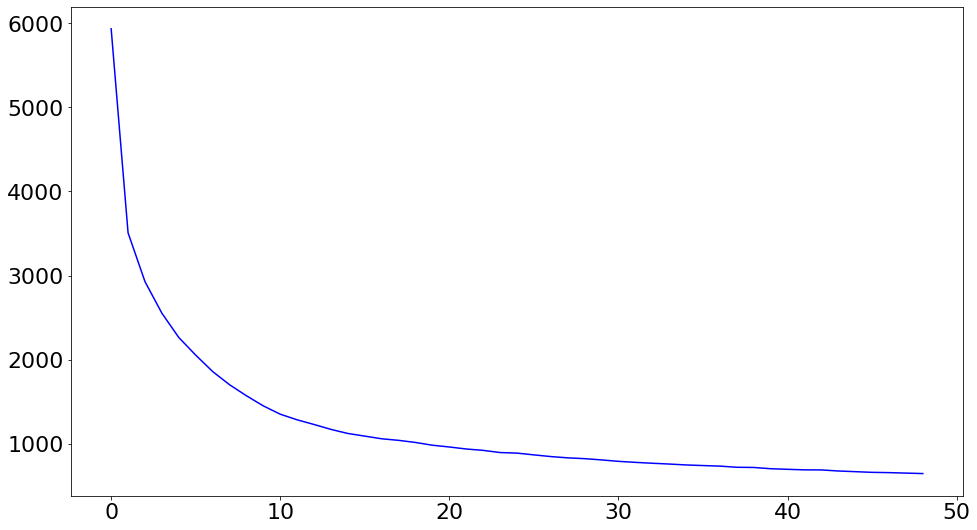

In [20]:
plt.plot(cost, 'b-')

In [27]:
kmean = KMeans(5)
kmean.fit(X)
labels = pd.DataFrame({'cluster': kmean.labels_})

In [28]:
labels.value_counts(sort=False)

cluster
0          1167
1          3577
2          2165
3          1191
4           850
dtype: int64

In [29]:
clusters = pd.concat([data, labels], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12,1
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12,1
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12,3
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,312.34,0.00,12,1
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12,1


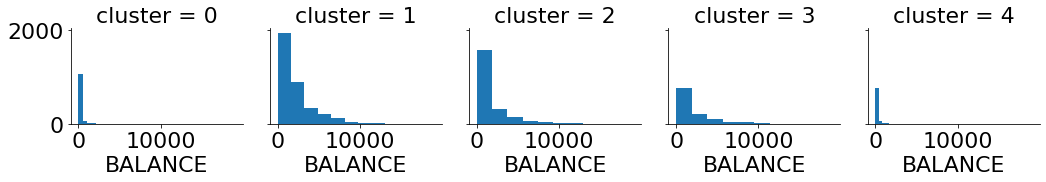

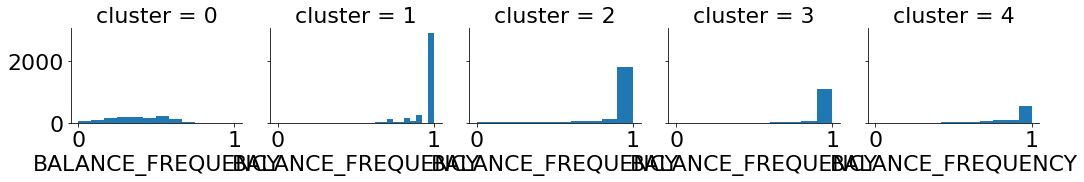

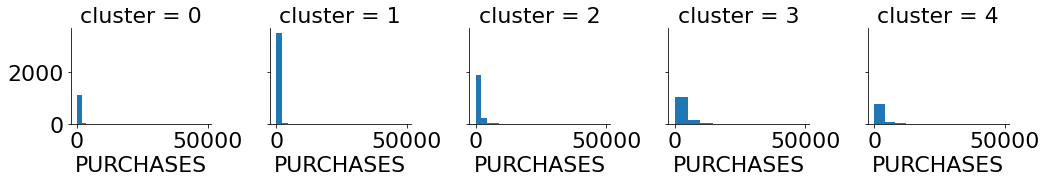

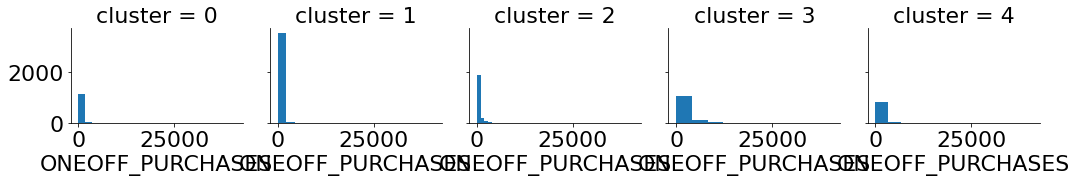

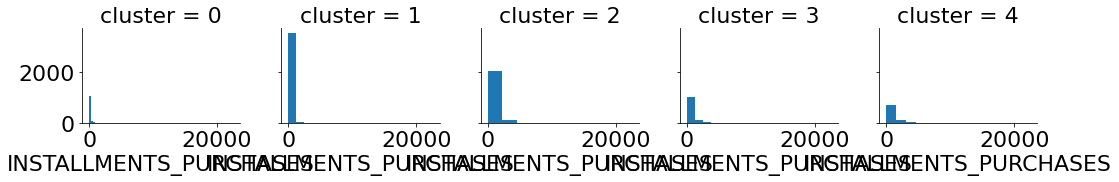

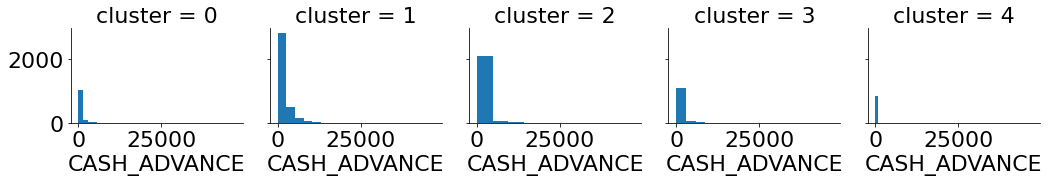

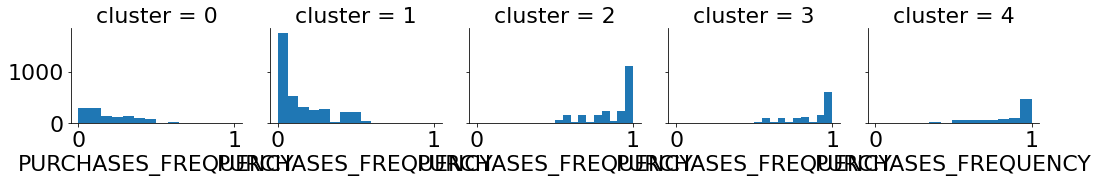

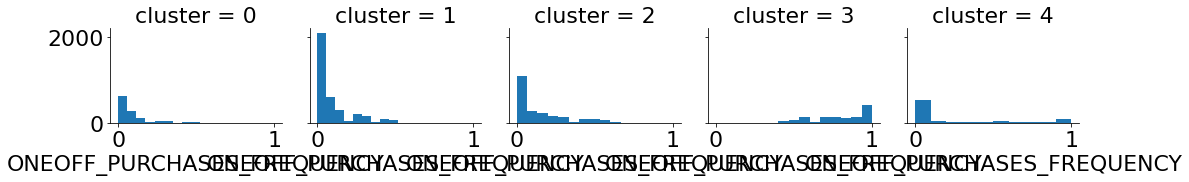

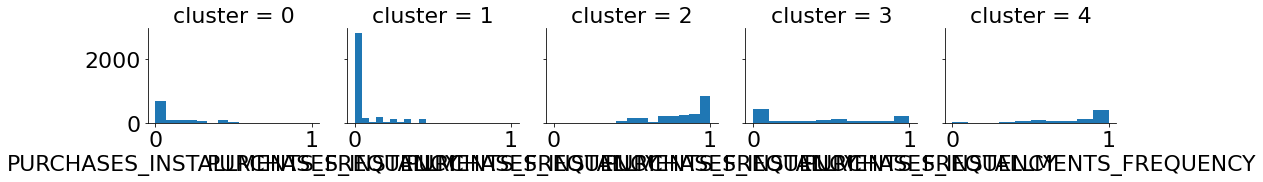

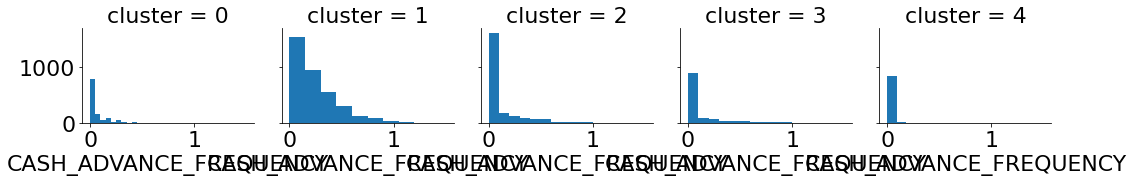

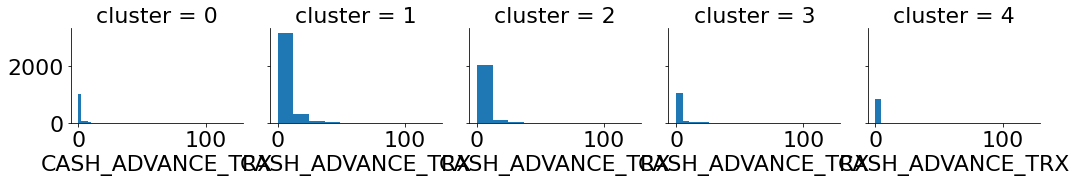

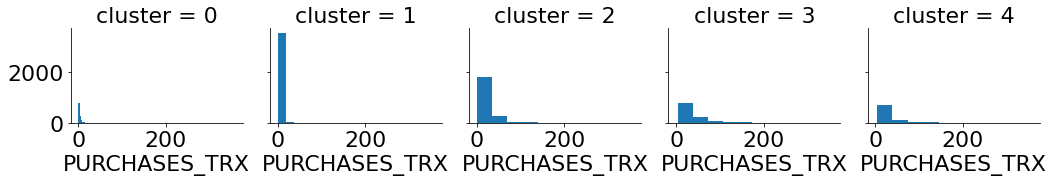

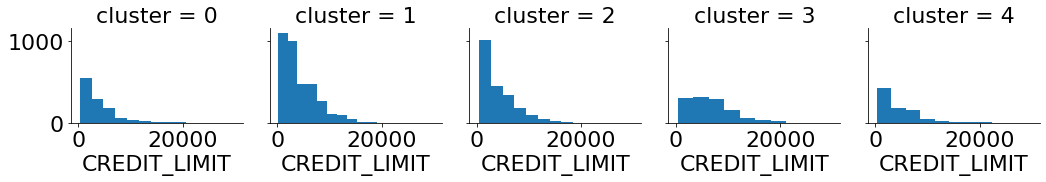

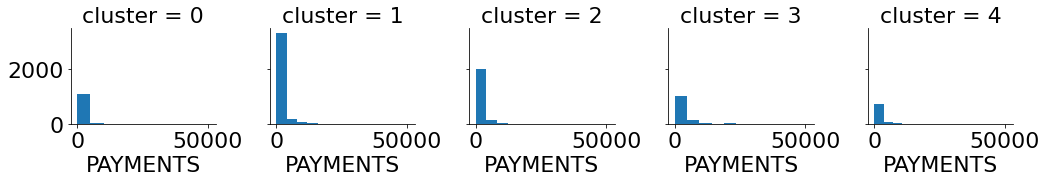

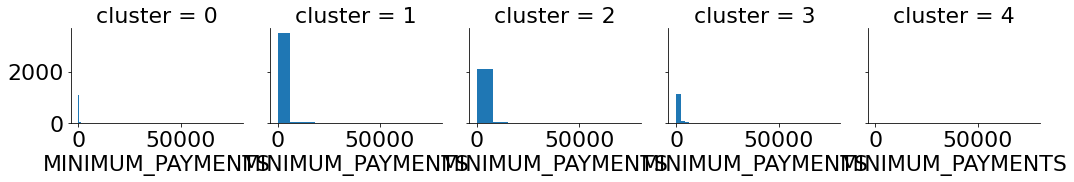

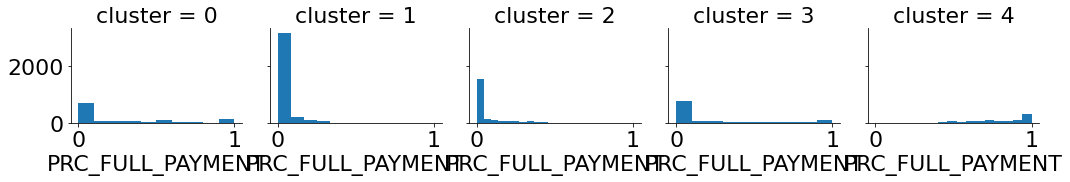

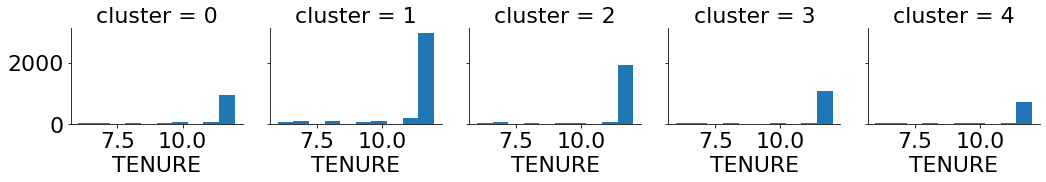

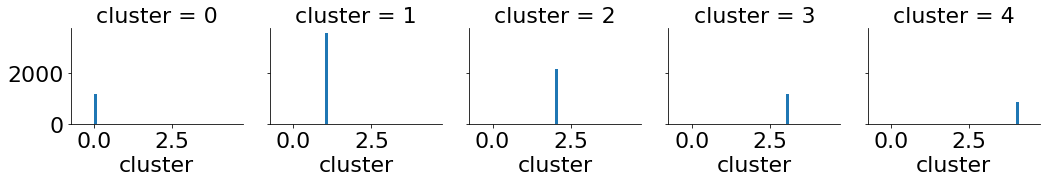

In [30]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)